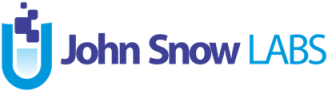

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlptest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/NarrativeQA_Question_Answering.ipynb)

# Getting started with LangTest on John Snow Labs

In [ ]:
!pip install langtest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
|**model**     |LLM model name (ex: text-davinci-002, command-xlarge-nightly etc.)|
|**data**       |Benchmark dataset name (ex: BoolQ-test, XSum-test etc.)|
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.|
|**hub**       | Name of the hub (ex: openai, azure-openai, ai21, cohere etc.)|

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [2]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## NarrativeQA 
Paper: [The NarrativeQA Reading Comprehension Challenge](https://aclanthology.org/Q18-1023/)

**Dataset Summary**

NarrativeQA is a dataset to test the model's reading ability. It has 1567 stories (books and movie scripts). And there are over 46k total question-answer pairs for those stories. Answers are human written and generally short. LangTest uses only test data due to file size and we indeed want to use the test data for testing the model.

**Data Splits**

- `NarrativeQA-test` :	Test set from the NarrativeQA dataset, containing 10857 question-answer pairs.
- `NarrativeQA-test-tiny` :	50 random samples for NarrativeQA-test dataset to reduce the cost and computation time.

### Setup and Configure Harness

In [12]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='NarrativeQA-test-tiny')

## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [13]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66}, 
        'add_slangs':{'min_pass_rate': 0.60},
      }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'add_slangs': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [14]:
harness.data = harness.data[:10]

### Generating the test cases.

In [15]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


In [16]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,The play is set in Napoleonic times.\nAct 1\nT...,What do Phoebe and her sister do to earn their...,THE PLAY IS SET IN NAPOLEONIC TIMES.\nACT 1\nT...,WHAT DO PHOEBE AND HER SISTER DO TO EARN THEIR...
1,robustness,uppercase,"In Desperate Remedies a young woman, Cytherea ...",Who is Miss aldclyffe?,"IN DESPERATE REMEDIES A YOUNG WOMAN, CYTHEREA ...",WHO IS MISS ALDCLYFFE?
2,robustness,uppercase,The framing story concerns a man who dreams of...,What does Severin tell the man how to break?,THE FRAMING STORY CONCERNS A MAN WHO DREAMS OF...,WHAT DOES SEVERIN TELL THE MAN HOW TO BREAK?
3,robustness,uppercase,The play is set in Dijon in Burgundy in the la...,WHO DOES BEAUMELLE HAVE AN AFFAIR WITH?,THE PLAY IS SET IN DIJON IN BURGUNDY IN THE LA...,WHO DOES BEAUMELLE HAVE AN AFFAIR WITH?
4,robustness,uppercase,"In The Mardi Gras Mystery, Nancy's boyfriend, ...",What was the ransom money from the stolen pain...,"IN THE MARDI GRAS MYSTERY, NANCY'S BOYFRIEND, ...",WHAT WAS THE RANSOM MONEY FROM THE STOLEN PAIN...
5,robustness,uppercase,The novel is largely set in and near the town ...,Who proposes to Mary Masters?,THE NOVEL IS LARGELY SET IN AND NEAR THE TOWN ...,WHO PROPOSES TO MARY MASTERS?
6,robustness,uppercase,The plot concerns the children of the Duke of ...,"What does Gerald, the youngest son of the Duke...",THE PLOT CONCERNS THE CHILDREN OF THE DUKE OF ...,"WHAT DOES GERALD, THE YOUNGEST SON OF THE DUKE..."
7,robustness,uppercase,Moll's mother is a convict in Newgate Prison i...,How many servants were on the farm in Maryland?,MOLL'S MOTHER IS A CONVICT IN NEWGATE PRISON I...,HOW MANY SERVANTS WERE ON THE FARM IN MARYLAND?
8,robustness,uppercase,"On Christmas Eve, a year after the Nakatomi To...",What occupation does Marvin have?,"ON CHRISTMAS EVE, A YEAR AFTER THE NAKATOMI TO...",WHAT OCCUPATION DOES MARVIN HAVE?
9,robustness,uppercase,"Froudacity is split into four books, each addr...",What church did slave owners in the West Indie...,"FROUDACITY IS SPLIT INTO FOUR BOOKS, EACH ADDR...",WHAT CHURCH DID SLAVE OWNERS IN THE WEST INDIE...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [17]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [01:31<00:00,  4.60s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [18]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The play is set in Napoleonic times.\nAct 1\nT...,What do Phoebe and her sister do to earn their...,THE PLAY IS SET IN NAPOLEONIC TIMES.\nACT 1\nT...,WHAT DO PHOEBE AND HER SISTER DO TO EARN THEIR...,Phoebe and her sister set up a school to pay ...,PHOEBE AND HER SISTER SET UP A SCHOOL TO PAY ...,True
1,robustness,uppercase,"In Desperate Remedies a young woman, Cytherea ...",Who is Miss aldclyffe?,"IN DESPERATE REMEDIES A YOUNG WOMAN, CYTHEREA ...",WHO IS MISS ALDCLYFFE?,Miss Aldclyffe is the eccentric woman whom Cy...,Miss Aldclyffe,False
2,robustness,uppercase,The framing story concerns a man who dreams of...,What does Severin tell the man how to break?,THE FRAMING STORY CONCERNS A MAN WHO DREAMS OF...,WHAT DOES SEVERIN TELL THE MAN HOW TO BREAK?,Severin tells the man how to break himself of...,HIS FASCINATION WITH CRUEL WOMEN,False
3,robustness,uppercase,The play is set in Dijon in Burgundy in the la...,WHO DOES BEAUMELLE HAVE AN AFFAIR WITH?,THE PLAY IS SET IN DIJON IN BURGUNDY IN THE LA...,WHO DOES BEAUMELLE HAVE AN AFFAIR WITH?,Novall Junior,NOVALL JUNIOR,True
4,robustness,uppercase,"In The Mardi Gras Mystery, Nancy's boyfriend, ...",What was the ransom money from the stolen pain...,"IN THE MARDI GRAS MYSTERY, NANCY'S BOYFRIEND, ...",WHAT WAS THE RANSOM MONEY FROM THE STOLEN PAIN...,Plastic surgery,Plastic surgery,True
5,robustness,uppercase,The novel is largely set in and near the town ...,Who proposes to Mary Masters?,THE NOVEL IS LARGELY SET IN AND NEAR THE TOWN ...,WHO PROPOSES TO MARY MASTERS?,Reginald Morton,REGINALD MORTON,True
6,robustness,uppercase,The plot concerns the children of the Duke of ...,"What does Gerald, the youngest son of the Duke...",THE PLOT CONCERNS THE CHILDREN OF THE DUKE OF ...,"WHAT DOES GERALD, THE YOUNGEST SON OF THE DUKE...",Gerald gets himself expelled from Cambridge a...,Gerald gets himself expelled from Cambridge a...,True
7,robustness,uppercase,Moll's mother is a convict in Newgate Prison i...,How many servants were on the farm in Maryland?,MOLL'S MOTHER IS A CONVICT IN NEWGATE PRISON I...,HOW MANY SERVANTS WERE ON THE FARM IN MARYLAND?,50 servants,50 SERVANTS,True
8,robustness,uppercase,"On Christmas Eve, a year after the Nakatomi To...",What occupation does Marvin have?,"ON CHRISTMAS EVE, A YEAR AFTER THE NAKATOMI TO...",WHAT OCCUPATION DOES MARVIN HAVE?,Janitor,Janitor,True
9,robustness,uppercase,"Froudacity is split into four books, each addr...",What church did slave owners in the West Indie...,"FROUDACITY IS SPLIT INTO FOUR BOOKS, EACH ADDR...",WHAT CHURCH DID SLAVE OWNERS IN THE WEST INDIE...,Catholic Church,CATHOLIC CHURCH,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [19]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,2,8,80%,66%,True
1,robustness,add_slangs,3,7,70%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [20]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='NarrativeQA-test-tiny')

In [21]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
    'fairness': {
      'min_gender_rougeL_score': {'min_score': 0.66}, 
      'max_gender_rougeLsum_score': {'max_score': 0.66},  
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rougeL_score': {'min_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [22]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1485.24it/s]


In [23]:
harness.testcases()

,category,test_type,test_case,expected_result
0,fairness,min_gender_rougeL_score,male,0.66
1,fairness,min_gender_rougeL_score,female,0.66
2,fairness,min_gender_rougeL_score,unknown,0.66
3,fairness,max_gender_rougeLsum_score,male,0.66
4,fairness,max_gender_rougeLsum_score,female,0.66
5,fairness,max_gender_rougeLsum_score,unknown,0.66


### Running the tests

In [25]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 6/6 [00:16<00:00,  1.35s/it]

### Generated Results

In [26]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rougeL_score,male,0.66,0.571585,False
1,fairness,min_gender_rougeL_score,female,0.66,0.483333,False
2,fairness,min_gender_rougeL_score,unknown,0.66,1.000000,True
3,fairness,max_gender_rougeLsum_score,male,0.66,0.568188,True
4,fairness,max_gender_rougeLsum_score,female,0.66,0.483333,True
5,fairness,max_gender_rougeLsum_score,unknown,0.66,1.000000,False


### Final Results

In [27]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rougeL_score,2,1,33%,65%,False
1,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [28]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='NarrativeQA-test-tiny',)

In [29]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
    'accuracy': {
        'min_exact_match_score': {'min_score': 0.80}, 
        'min_rouge2_score':{'min_score': 0.80},
        'min_rougeL_score':{'min_score': 0.80},
        'min_bleu_score':{'min_score': 0.80},
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [31]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]


In [32]:
harness.testcases()

,category,test_type,expected_result
0,accuracy,min_exact_match_score,0.8
1,accuracy,min_rouge2_score,0.8
2,accuracy,min_rougeL_score,0.8
3,accuracy,min_bleu_score,0.8


### Running the tests

In [33]:
harness.run()

Running testcases... :   0%|          | 0/4 [00:00<?, ?it/s]

Running testcases... :  75%|███████▌  | 3/4 [00:10<00:02,  2.46s/it]

Running testcases... : 100%|██████████| 4/4 [00:12<00:00,  3.05s/it]


### Generated Results

In [34]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.150000,False
1,accuracy,min_rouge2_score,0.8,0.391955,False
2,accuracy,min_rougeL_score,0.8,0.539386,False
3,accuracy,min_bleu_score,0.8,0.110786,False


### Final Results

In [35]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge2_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
